# パターン認識問題を解いてみる

## パターン識別編（1次元のロジスティック回帰）

解説付きでコードを示しています．使い方としては

1. 上から順に読んで（重要），
2. セルを実行していってください．
3. 理解できない場合は，スタッフに質問を投げるなどしてください．
4. 理解が進んだら，自分のノートを作成し，ページにコードを真似して記述していってください．

In [ ]:
import numpy as np
import matplotlib.pylab as plt

数直線上のデータを２クラスに分類する問題を考える
データは， 0.2 と 0.8 を中心とするガウス分布で生成する

* 0.2 を中心とするデータには ０ のラベル
* 0.8 を中心とするデータには 1 のラベル



In [ ]:
# ここらへんのパラメータはいじってく遊んでください

N = 200     # 点の個数
m1 = 0.3    # クラス１の中心
m2 = 0.9    # クラス２の中心
sgm = 0.1 # ガウス分布の標準偏差

x1 = m1 + sgm * np.random.randn(N//2) # N(x1 | m1, sgm^2)
x2 = m2 + sgm * np.random.randn(N//2) # N(x2 | m2, sgm^2)
y1 = np.repeat(0, N//2)
y2 = np.repeat(1, N//2)

x = np.hstack((x1, x2))
y = np.hstack((y1, y2))

### これで下準備完了
(x, y) にデータが入っている．これのプロットと真の直線の関係を見てみる

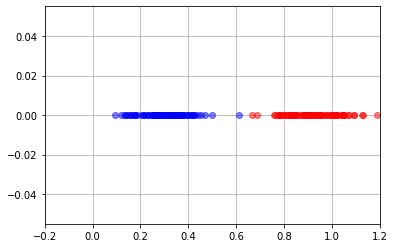

In [ ]:
# 数直線上にデータをばらまくとかんな感じ
plt.plot( x[y == 0], np.repeat(0, np.sum(y==0)), 'bo', alpha=0.5) # y == 0 の点を描画
plt.plot( x[y == 1], np.repeat(0, np.sum(y==1)), 'ro', alpha=0.5) # y == 1 の点を描画
plt.xlim(-0.2, 1.2)
plt.grid()

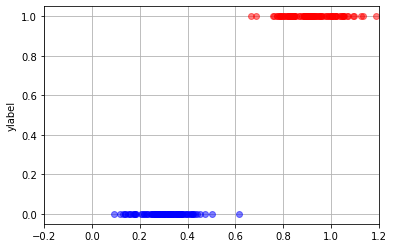

In [ ]:
# ｙのラベルをそれぞれ 0 と　1 という値として図を書くとこんな感じになる
plt.plot(x[y==0], y[y==0], 'bo', alpha=0.5)
plt.plot(x[y==1], y[y==1], 'ro', alpha=0.5)
plt.ylabel('ylabel')
plt.xlim(-0.2, 1.2)
plt.grid()

上図を見る限り x=0.5 より小さい付近だと青で，それより大きくなると赤と判断してよさそう．
それでは，この赤と青のクラスの境界はどこに置くのがよさそうかを考えてみよう．というのがお題になります．

### 問い: 赤点と青点の境界をx軸上に定めて赤/青クラスを判別することは可能か？

図をみたらおおよそ，0.5 付近が境界なんだろというのは見たらわかります．（そういう風に問題を作っているので）
問題はこの値をアルゴリズムを介して得るにはどうしたらよいか？を問うています．

ということで，１次元のデータ上でクラス境界を求めます．
データの点群を $\{x_n\}$ とすると， 0 のラベルが付いたクラスと 1 のラベルのついたクラスが，上図のように張り付くので
ロジスティック関数を適当にパラメータを変えつつ貼り付けてフィッティングします．（ロジスティック回帰と呼ばれる）．

ロジスティック関数は下のような関数

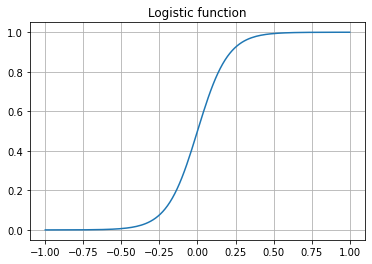

In [ ]:
xx = np.linspace(-1, 1, 128)
beta = 10.0
yy = 1 / (1 + np.exp(-beta * xx))
plt.plot(xx, yy)
plt.title('Logistic function')
plt.grid()

ロジスティック関数を上述のデータにフィッティングさせて，クラス 0 か 1 の確信度をロジスティック関数値で記載しよう，というのが機械学習的な方法になります．
以下，面倒なので，標準ロジスティック関数を　$\sigma$ として表記します．
$$
\sigma(u) = \frac{1}{1+\exp(-u)}
$$
ロジスティック回帰の場合は， 変数の線形和をロジスティック関数にかけることで
推定モデルをつくります．
この場合は $x$ は１変数なので， $f(x; w) = \sigma( w_1 x + w_0)$ とおいて， $w_0$ と $w_1$ を推定することを考えます

さらにロス関数も普通の回帰の時（二乗誤差だったことを思い出してください）とは異なりちょっと特殊になります．

* ラベル$y$ が 0 のときは， $f(x, w)$ も ０ に近い値であってほしい
* ラベル$y$ が 1 のときは， $f(x, w)$ は，1 に近い値であってほしい→ $1 - f(x, w)$ が　０に近い値であってほしい

ということなので， $\prod_n f(x_n, w)^{y_n} (1-f(x_n, w)）^{1-y_n}$ ができるだけ大きい値をとればよいということになります．
ただ，このままだと微分とかの操作が厄介なので単調関数の $\log$ をとって，ロス関数の体裁に合わせるために負号をつけることで
$$
    J(w) = - \sum_n y_n \log f(x_n, w) + (1-y_n) \log (1-f(x_n, w))
$$
を使います．この関数は交差エントロピー(Binary Cross Entropy: BCE)関数と呼ばれます．
また，ロス関数に二乗誤差を使っても実験は可能ですが，性能において BCE 関数を用いたロス関数におとります．
理由が知りたい人は質問してください．

あとは線形回帰のときと同じく

### モデル $f(x_n; w)$ のロスが小さくなるように $w$ を求める．

ことになります

## Scikit-Learn を用いた場合

この場合は単なる回帰ではなくロジスティック回帰をしないといけないのだけど，これも Scikit-Learn には用意されているので，それをインポートしてくればよい．
`LogisticRegression` モデルは，2クラス分類で用いられるクラスで，クラスの確率値を吐き出してくれるので，これを識別機(Classifier）として用いる．学習時になることは `fit` すること．

In [ ]:
# ロジスティック回帰モデルをインポート
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

# モデルを構築
clsf = LogisticRegression()
# データにフィット
clsf.fit(x.reshape(N, 1), y)

LogisticRegression()

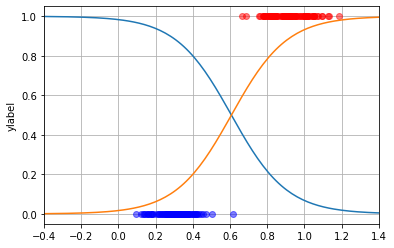

In [35]:
# ｙのラベルをそれぞれ 0 と　1 という値として図を書くとこんな感じになる
plt.plot(x[y==0], y[y==0], 'bo', alpha=0.5)
plt.plot(x[y==1], y[y==1], 'ro', alpha=0.5)
plt.ylabel('ylabel')
plt.xlim(-0.4, 1.4)
plt.grid()

# それじゃ，x = [-0.3, 1.4] の区間の値を予測してラベルを張り付けてみよう
xx = np.linspace(-0.4, 1.4, 128)
yy = clsf.predict_proba(xx.reshape(128,1))

plt.plot(xx, yy) #青線が青クラスの確率値，オレンジ線は赤クラスの確率値

## Keras + TensorFlow を用いた解法

前述の通り，普通は，こんな単純な識別問題には *使いません* ．
違うところは，ロジスティック関数をかけるために *活性化関数* というものを使います．
活性化関数は計算した線形和に変調をかけるための関数です．
ロジスティック関数は, 活性化関数として 'sigmoid' と呼ばれるタイプのものを選べばOK（のはず）です．

ロスに関しては 'binary_crossentropy' を選べばOKです．

結構時間かかります．

収束に時間かかるので，純粋な 'sgd' (確率降下法）ではなく 'adam' と呼ばれる最適化メソッド使います

あとで表示するロスの値が収束していなさそうであれば， epochs パラメータ増やして再度実験してください．

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()   # 階層型のモデルを選択
model.add(Dense(1, input_shape=(1,), use_bias=True))
model.add(Activation('sigmoid')) # ロジスティック回帰の時は出力層がsigmoid になるのでこれを追加

model.compile(loss='binary_crossentropy',  optimizer='adam') #最適化手法を指定．sgd から adam に変更

In [ ]:
# 学習によるパラメータフィット
# 何回かこのセルを実行するか，Epoch 回数を増やすことでフィッティングの精度を上げることは可能
# (時間かかるけど)
#hist = model.fit(x, y, epochs=1024, batch_size=100, verbose=1)

hist = model.fit(x, y, epochs=8192, batch_size=100, verbose=0)

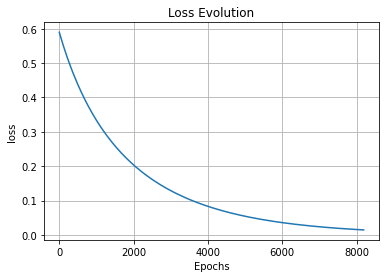

In [ ]:
# ロスの値が学習によってどう変わるかを表示

plt.plot(hist.history['loss'])
#plt.semilogy(hist.history['loss']) #対数表示の方が騰落率の機微が読み取れる
plt.title('Loss Evolution')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.grid()


かなり頑張ってる．（収束しているかは微妙かも）

演習なので，ここらで打ち切って，とりあえず，パラメータを取り出して確認してみる

In [ ]:
# 結合とバイアスを取り出す．

weights, biases = model.get_weights()

# 最初の素子のパラメータを w0, w1 とする

w1 = float(weights[0])
w0 = float(biases[0])

print("w0, w1 = (%.3f, %.3f)" % (w0, w1))

w0, w1 = (-8.765, 14.869)


推定直線とデータ，真の直線を重ねて見る

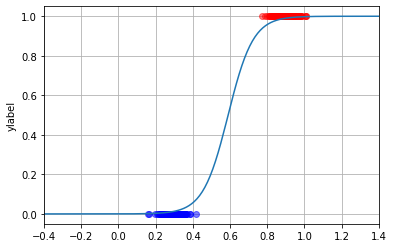

In [ ]:
# ｙのラベルを値として図を書くとこんな感じになる
plt.plot(x[y==0], y[y==0], 'bo', alpha=0.5)
plt.plot(x[y==1], y[y==1], 'ro', alpha=0.5)
plt.ylabel('ylabel')
plt.grid()
plt.xlim(-0.4, 1.4)

xx = np.linspace(-0.4, 1.4, 128)
yy = 1/ (1+ np.exp(- (w1 *xx + w0)))
plt.plot(xx, yy)

うん，大体あってそう.

* y軸の値が０に近ければ，クラス０，
* y軸の値が1 に近ければ，クラス１

に分類すれば良さそうなので，　x = 0.6 付近が境界になる．
これは作成データから眺めると，まぁ，ただしそう